In [49]:
import sys        
import random
import warnings

import time
import numpy as np
import pandas as pd
import collections, functools, operator

sys.path.append('/Users/moises/Desktop/Produccion-Tesis')
from M2 import *

# Parameters of system
warnings.filterwarnings("ignore")


#### Analisis de resultados

In [50]:
escenario_A = 4
escenario_B = 6
variable = 'Entero'

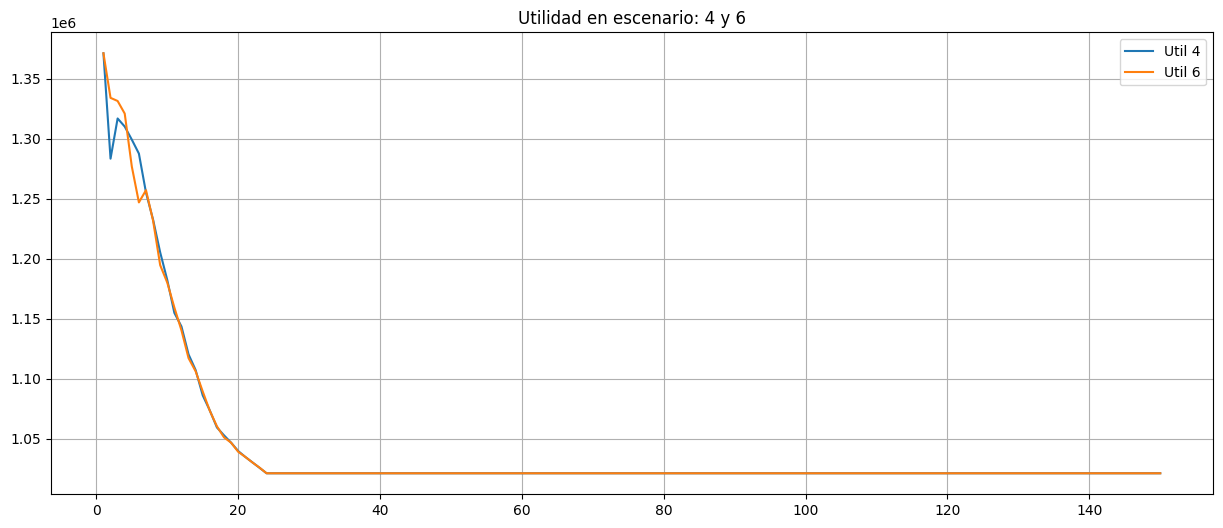

In [51]:
def generador_utilidad(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    P = pd.read_excel(file_name+"objective_value.xlsx")
    P['value'] = P['value']/replics
    P = P.groupby(['t']).sum().reset_index()[['t','value']]
    return P

util_A = generador_utilidad(escenario_A)
util_B = generador_utilidad(escenario_B)


plt.figure(figsize=(15,6))
plt.grid(True)

# Utilidades
plt.plot(util_A.t, util_A.value, label=f"Util {escenario_A}")
plt.plot(util_B.t, util_B.value, label=f"Util {escenario_B}")

plt.legend()
plt.title(label=f"Utilidad en escenario: {escenario_A} y {escenario_B}")
plt.show()

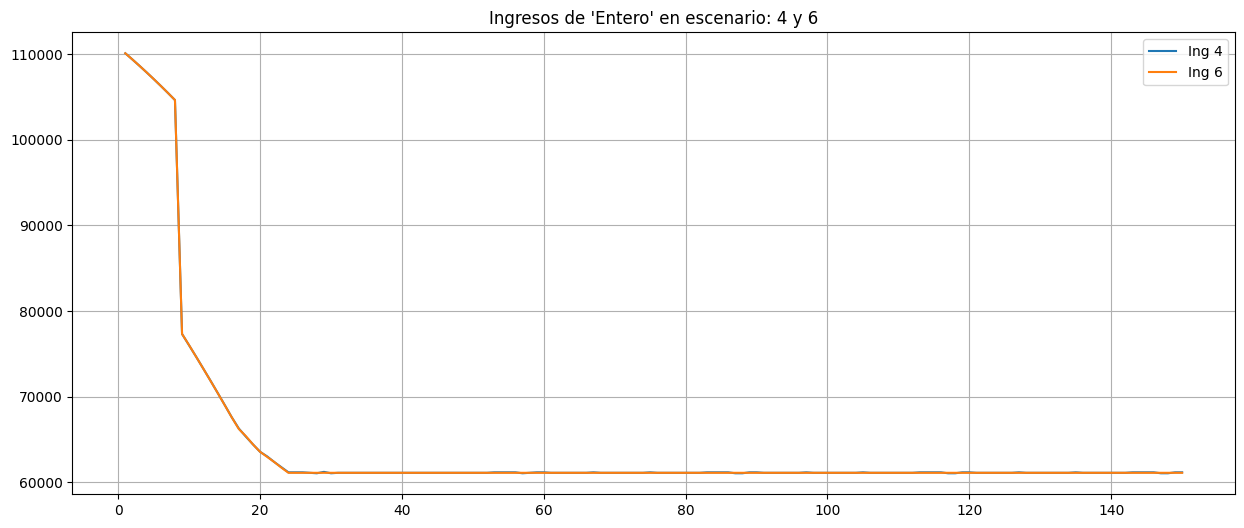

In [52]:
def generador_ingresos(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    ing = pd.read_excel(file_name+"ingresos.xlsx")
    ing['value'] = ing['value']/replics
    ing = ing.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return ing

#Ingresos
ing_A = generador_ingresos(escenario_A)
ing_B = generador_ingresos(escenario_B)


plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(ing_A.t[ing_A.f == variable], ing_A.value[ing_A.f == variable], label=f"Ing {escenario_A}")
plt.plot(ing_B.t[ing_B.f == variable], ing_B.value[ing_B.f == variable], label=f"Ing {escenario_B}")

plt.legend()
plt.title(label=f"Ingresos de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

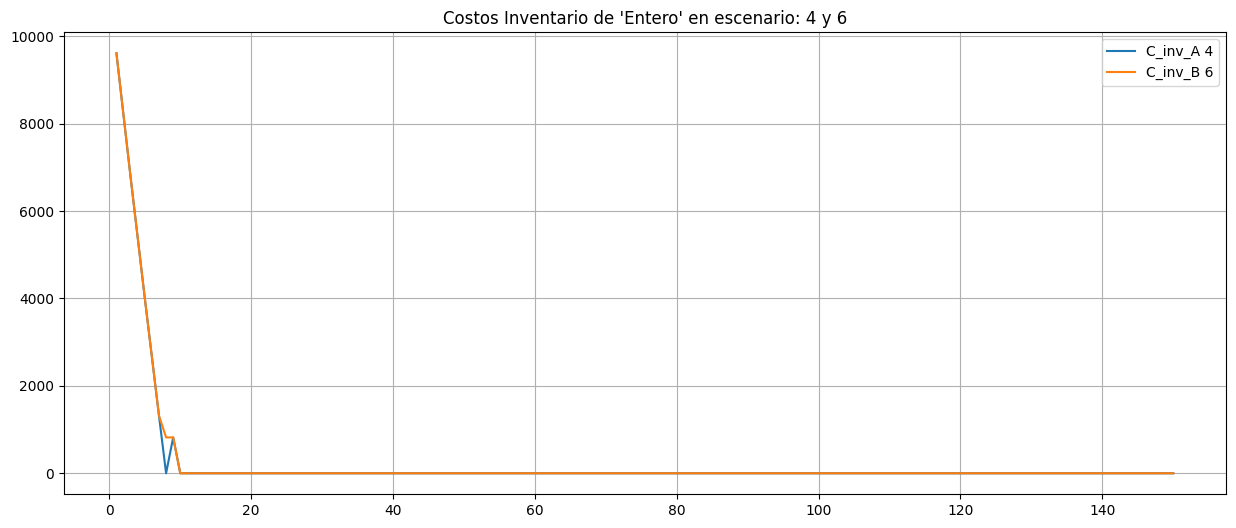

In [53]:
def generador_cotos_inventario(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    c_inv = pd.read_excel(file_name+"costo_inventario.xlsx")
    c_inv['value'] = c_inv['value']/replics
    c_inv = c_inv.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return c_inv

#Ingresos
c_inv_A = generador_cotos_inventario(escenario_A)
c_inv_B = generador_cotos_inventario(escenario_B)


plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(c_inv_A.t[c_inv_A.f == variable], c_inv_A.value[c_inv_A.f == variable], label=f"C_inv_A {escenario_A}")
plt.plot(c_inv_B.t[c_inv_B.f == variable], c_inv_B.value[c_inv_B.f == variable], label=f"C_inv_B {escenario_B}")

plt.legend()
plt.title(label=f"Costos Inventario de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

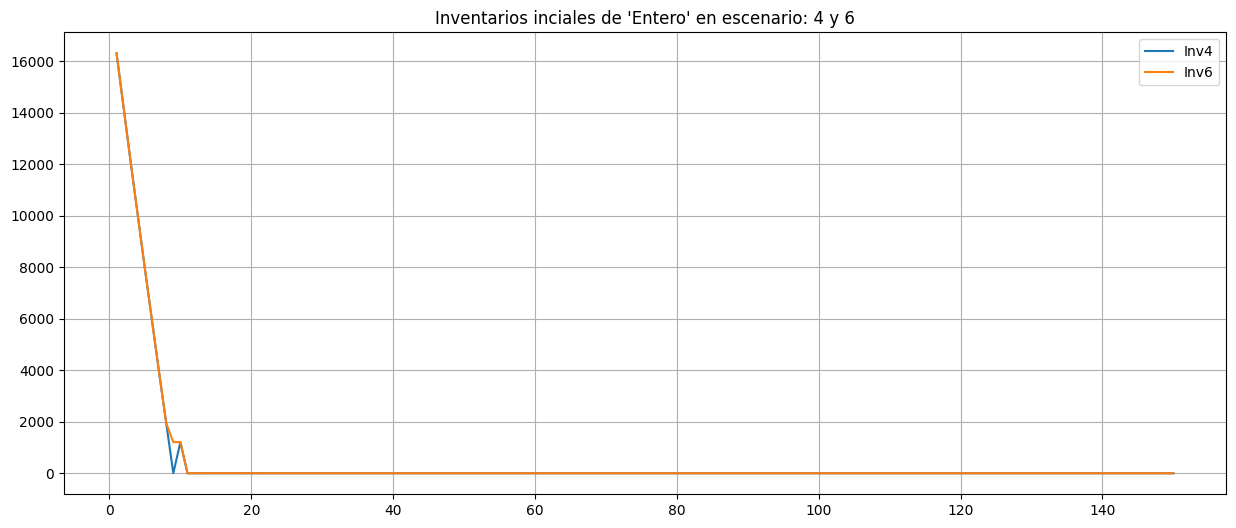

In [54]:
def generador_inventarios_iniciales(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    S_inicial = pd.read_excel(file_name+"S_inicial.xlsx")
    return S_inicial


S_A_inicial = generador_inventarios_iniciales(escenario_A)
S_B_inicial = generador_inventarios_iniciales(escenario_B)

plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(S_A_inicial.t[S_A_inicial.f == variable], S_A_inicial.value[S_A_inicial.f == variable], label=f"Inv{escenario_A}")
plt.plot(S_B_inicial.t[S_B_inicial.f == variable], S_B_inicial.value[S_B_inicial.f == variable], label=f"Inv{escenario_B}") 

plt.legend()
plt.title(label=f"Inventarios inciales de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

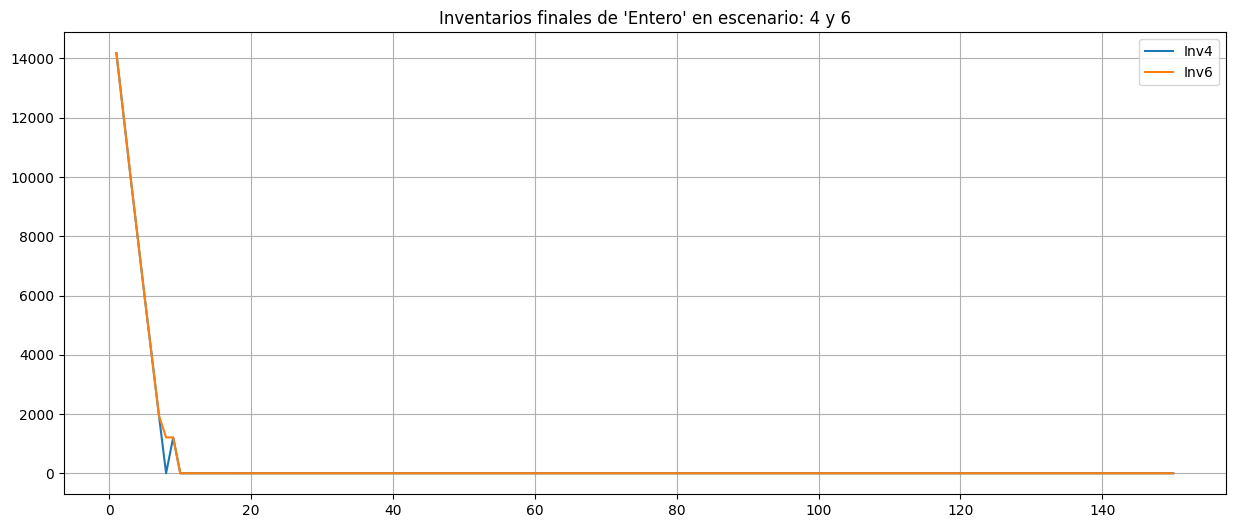

In [55]:
def generador_inventarios(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    S = pd.read_excel(file_name+"S.xlsx")
    S['value'] = S['value']/replics
    S = S.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return S

S_A = generador_inventarios(escenario_A)
S_B = generador_inventarios(escenario_B)

plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(S_A.t[S_A.f == variable], S_A.value[S_A.f == variable], label=f"Inv{escenario_A}")
plt.plot(S_B.t[S_B.f == variable], S_B.value[S_B.f == variable], label=f"Inv{escenario_B}") 

plt.legend()
plt.title(label=f"Inventarios finales de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

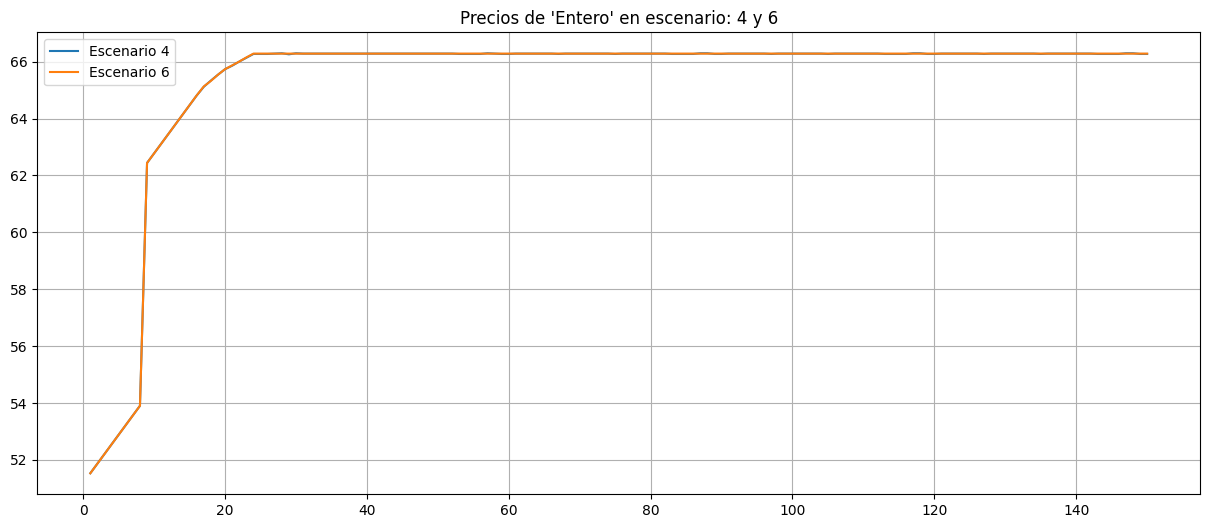

In [56]:
def generador_precios(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    P = pd.read_excel(file_name+"P.xlsx")
    P['value'] = P['value']/replics
    P = P.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return P

P_A = generador_precios(escenario_A)
P_B = generador_precios(escenario_B)

#Precios
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(P_A.t[P_A.f == variable], P_A.value[P_A.f == variable], label=f"Escenario {escenario_A}")
plt.plot(P_B.t[P_B.f == variable], P_B.value[P_B.f == variable], label=f"Escenario {escenario_B}") 

plt.legend()
plt.title(label=f"Precios de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

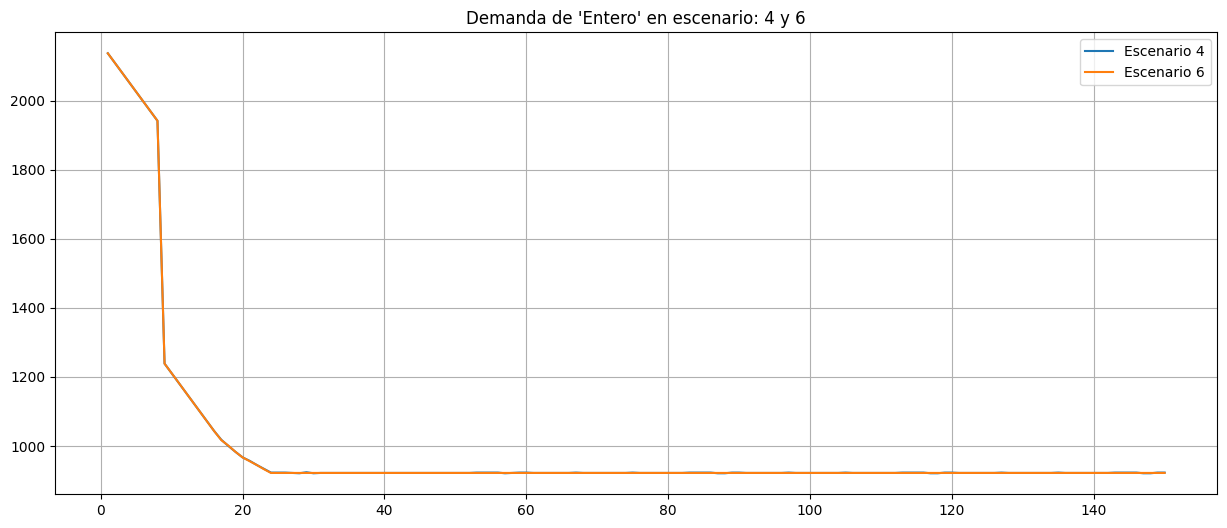

In [57]:
def generador_dda(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    D = pd.read_excel(file_name+"D.xlsx")
    D['value'] = D['value']/replics
    D = D.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return D

D_A = generador_dda(escenario_A)
D_B = generador_dda(escenario_B)

#Precios
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(D_A.t[D_A.f == variable], D_A.value[D_A.f == variable], label=f"Escenario {escenario_A}")
plt.plot(D_B.t[D_B.f == variable], D_B.value[D_B.f == variable], label=f"Escenario {escenario_B}") 

plt.legend()
plt.title(label=f"Demanda de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

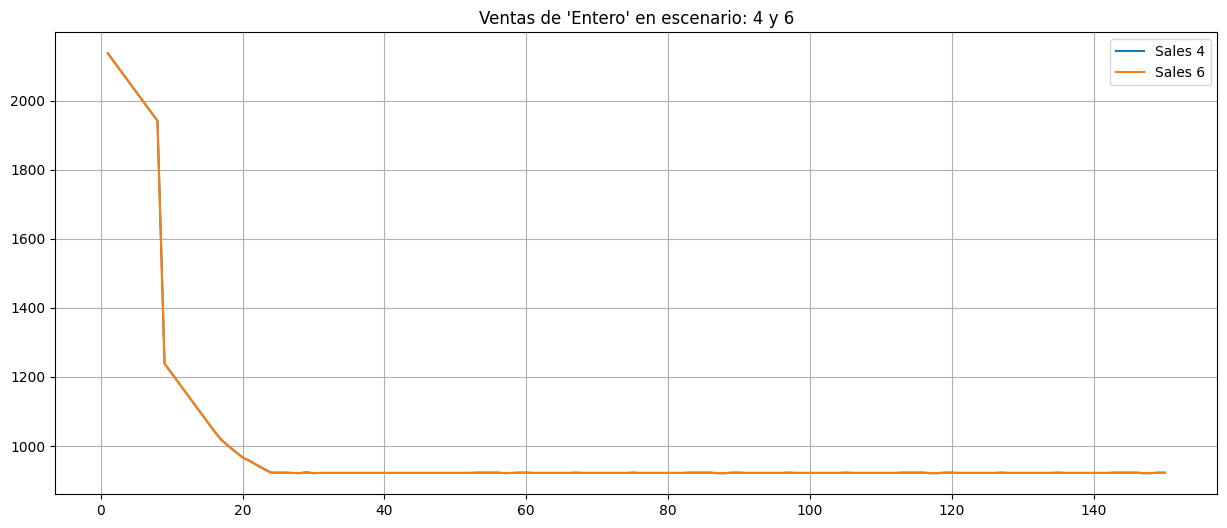

In [58]:
def generador_venta(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    sales = pd.read_excel(file_name+"sales.xlsx")
    sales['value'] = sales['value']/replics
    sales = sales.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return sales

sales_A = generador_venta(escenario_A)
sales_B = generador_venta(escenario_B)
        
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(sales_A.t[sales_A.f == variable], sales_A.value[sales_A.f == variable], label=f"Sales {escenario_A}")
plt.plot(sales_B.t[sales_B.f == variable], sales_B.value[sales_B.f == variable], label=f"Sales {escenario_B}") 

plt.legend()
plt.title(label=f"Ventas de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

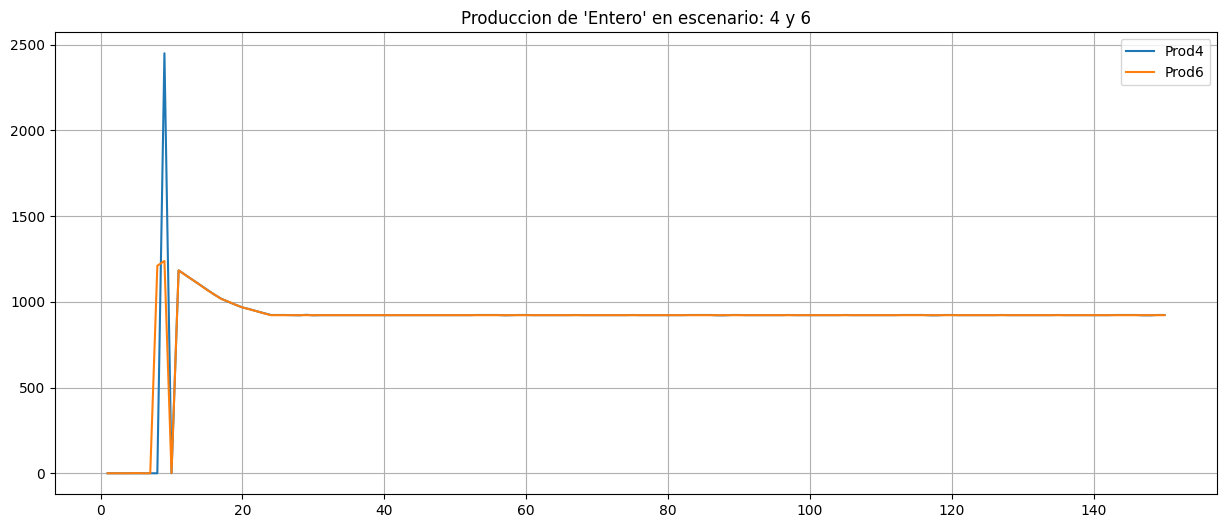

In [59]:
def generador_produccion(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    prod = pd.read_excel(file_name+"prod.xlsx")
    prod['value'] = prod['value']/replics
    prod = prod.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return prod

prod_A = generador_produccion(escenario_A)
prod_B = generador_produccion(escenario_B)

plt.figure(figsize=(15,6))
plt.grid(True)

# Produccion
plt.plot(prod_A.t[prod_A.f == variable], prod_A.value[prod_A.f == variable], label=f"Prod{escenario_A}")
plt.plot(prod_B.t[prod_B.f == variable], prod_B.value[prod_B.f == variable], label=f"Prod{escenario_B}")

plt.legend()
plt.title(label=f"Produccion de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

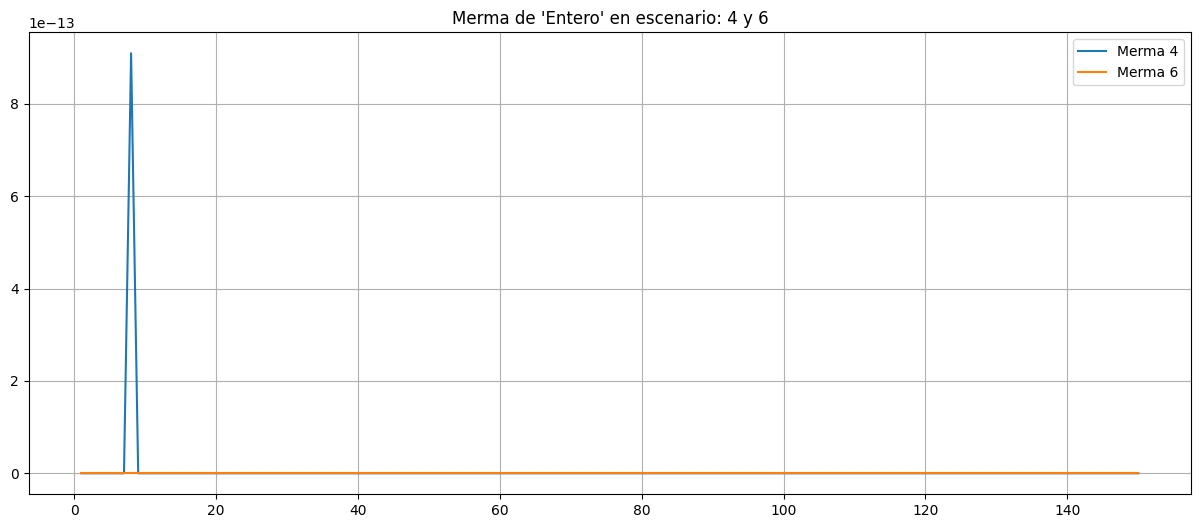

In [60]:

def generador_merma(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    L = pd.read_excel(file_name+"L.xlsx")
    L['value'] = L['value']/replics
    L = L.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return L

plt.figure(figsize=(15,6))
plt.grid(True)

merma_A = generador_merma(escenario_A)
merma_B = generador_merma(escenario_B)

# Merma
plt.plot(merma_A.t[merma_A.f == variable], merma_A.value[merma_A.f == variable], label=f"Merma {escenario_A}")
plt.plot(merma_B.t[merma_B.f == variable], merma_B.value[merma_B.f == variable], label=f"Merma {escenario_B}")

plt.legend()
plt.title(label=f"Merma de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()

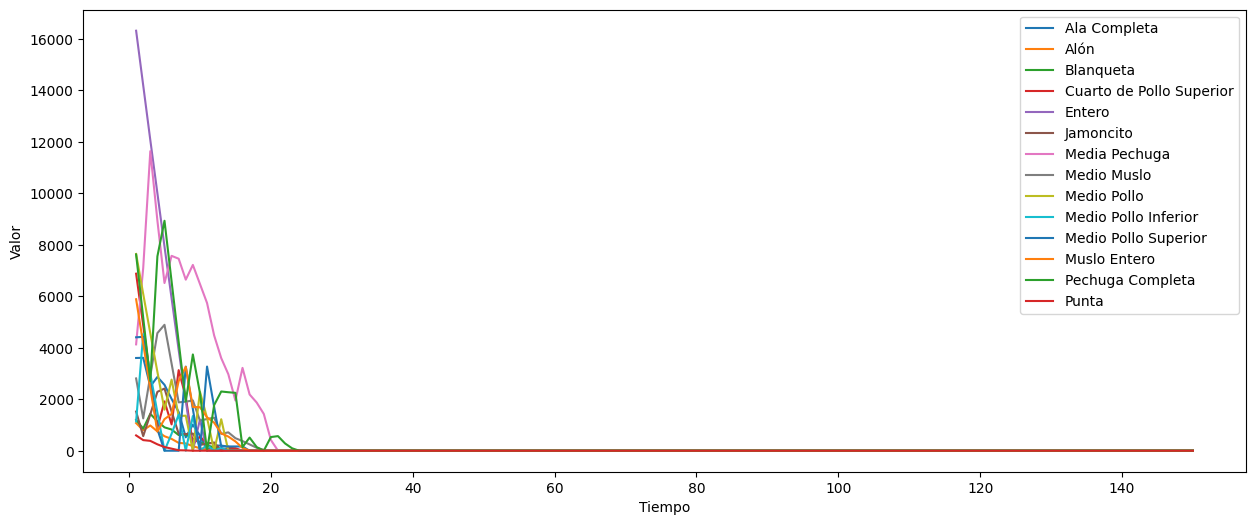

In [61]:
# Agrupar los datos por producto
def generador_inventarios_iniciales(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    S_inicial = pd.read_excel(file_name+"S_inicial.xlsx")
    return S_inicial


S_A_inicial = generador_inventarios_iniciales(escenario_A)

productos = S_A_inicial.groupby('f')
plt.figure(figsize=(15,6))

# Crear un gráfico para cada producto
for producto, datos_producto in productos:
        #if producto in ['Pechuga Completa']:
        plt.plot(datos_producto['t'], datos_producto['value'], label=producto)

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

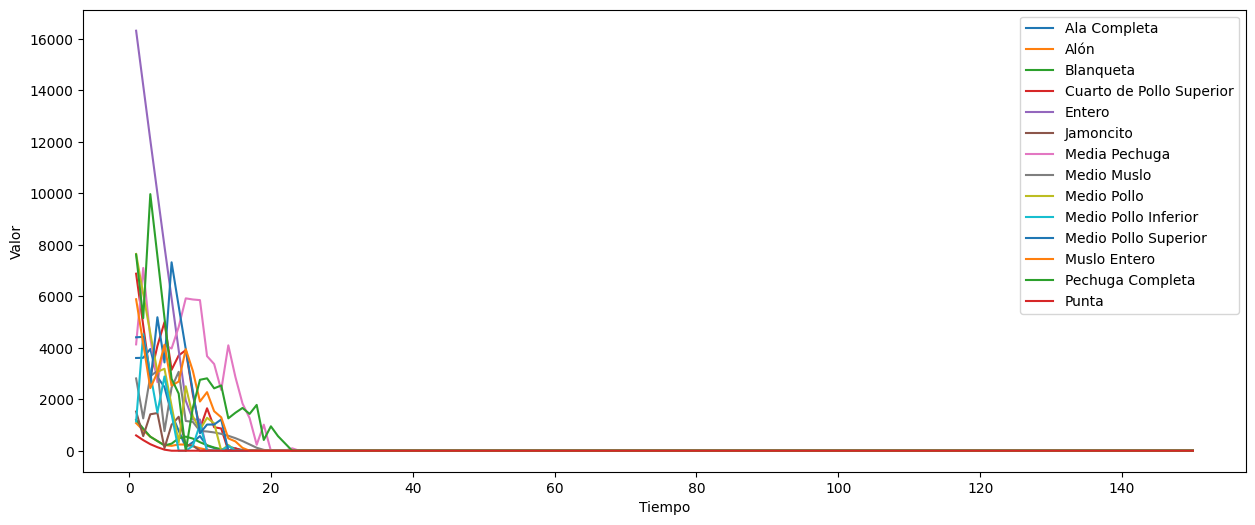

In [62]:
# Agrupar los datos por producto
S_B_inicial = generador_inventarios_iniciales(escenario_B)

productos = S_B_inicial.groupby('f')

plt.figure(figsize=(15,6))

# Crear un gráfico para cada producto
for producto, datos_producto in productos:
        #if producto in ['Pechuga Completa']:
        plt.plot(datos_producto['t'], datos_producto['value'], label=producto)

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

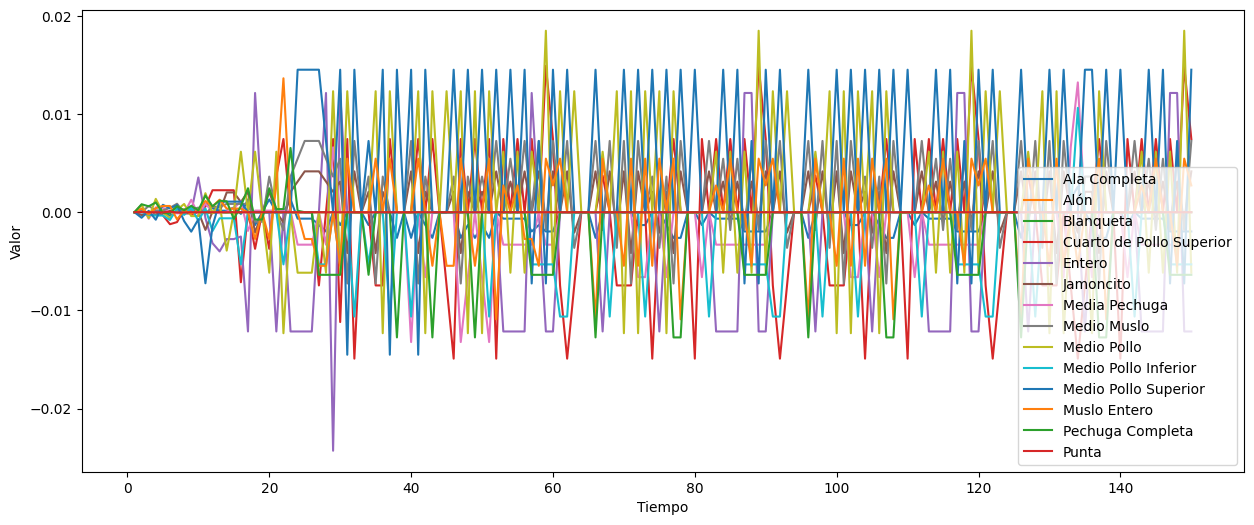

In [63]:
# Calculo de la diferencia de variables
df = pd.merge(P_A, P_B, on=['f', 't'])
df['value'] = df['value_x'] - df['value_y']

productos = df.groupby('f')

plt.figure(figsize=(15,6))

# Crear un gráfico para cada producto
for producto, datos_producto in productos:
        #if producto in ['Pechuga Completa']:
        plt.plot(datos_producto['t'], datos_producto['value'], label=producto)

# Personalizar el gráfico
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [64]:
for experiment in range (1, 7):
    if experiment in [1]:
        file_name = f"Resultados/Escenario {experiment}/"
        #file_name = f"/Users/moises/Desktop/Experimentos/Experimento - 40000 - alfa normal - w produccion - Sin Restriccion FIFO W0/Escenario {experiment}/"
        df = pd.read_excel(file_name+"objective_value.xlsx").rename(columns={'value': 'utilidad'}).groupby(['r']).sum().reset_index()['utilidad']
        df1 = pd.read_excel(file_name+"ingresos.xlsx").rename(columns={'value': 'ingresos'}).groupby(['r']).sum().reset_index()['ingresos']
        df2 = pd.read_excel(file_name+"costo_inventario.xlsx").rename(columns={'value': 'costo inventario'}).groupby(['r']).sum().reset_index()['costo inventario']
        df3 = pd.read_excel(file_name+"costo_corte.xlsx").rename(columns={'value': 'costo corte'}).groupby(['r']).sum().reset_index()['costo corte']
        df4 = pd.read_excel(file_name+"costo_merma.xlsx").rename(columns={'value': 'costo merma'}).groupby(['r']).sum().reset_index()['costo merma']
        df = pd.concat([df, df1, df2, df3, df4], axis=1)
df

,utilidad,ingresos,costo inventario,costo corte,costo merma
0,1.558703e+08,1.784366e+08,617428.383228,2.194324e+07,5591.951258


In [65]:
sys.path.append('/Users/moises/Desktop/Experimentos')

for experiment in range (1, 7):
    if experiment in [6]:
        file_name = f"Resultados/Escenario {experiment}/"
        #file_name = f"/Users/moises/Desktop/Experimentos/Experimento - 40000 - alfa normal - w produccion - Restriccion FIFO W0/Escenario {experiment}/"
        df = pd.read_excel(file_name+"objective_value.xlsx").rename(columns={'value': 'utilidad'}).groupby(['r']).sum().reset_index()['utilidad']
        df1 = pd.read_excel(file_name+"ingresos.xlsx").rename(columns={'value': 'ingresos'}).groupby(['r']).sum().reset_index()['ingresos']
        df2 = pd.read_excel(file_name+"costo_inventario.xlsx").rename(columns={'value': 'costo inventario'}).groupby(['r']).sum().reset_index()['costo inventario']
        df3 = pd.read_excel(file_name+"costo_corte.xlsx").rename(columns={'value': 'costo corte'}).groupby(['r']).sum().reset_index()['costo corte']
        df4 = pd.read_excel(file_name+"costo_merma.xlsx").rename(columns={'value': 'costo merma'}).groupby(['r']).sum().reset_index()['costo merma']
        df = pd.concat([df, df1, df2, df3, df4], axis=1)
df

,utilidad,ingresos,costo inventario,costo corte,costo merma
0,1.563852e+08,1.783954e+08,256394.938007,2.175381e+07,3.468585e-13


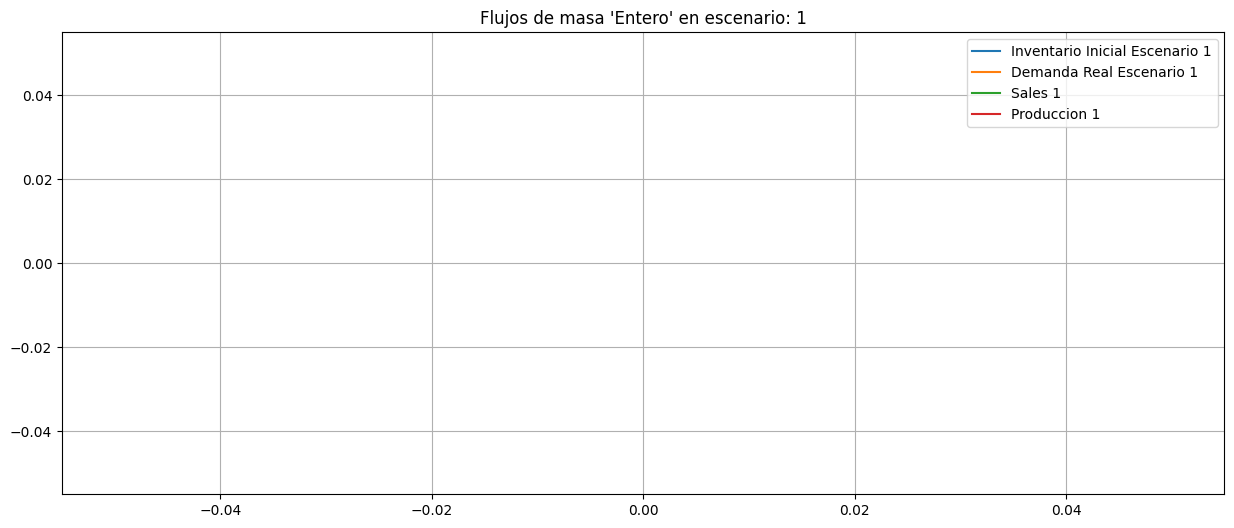

In [66]:
tiempo = 251
escenario = 1
variable = 'Entero'

def generador_inventarios_iniciales(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    S_inicial = pd.read_excel(file_name+"S_inicial.xlsx")
    S_inicial = S_inicial[S_inicial.t >= tiempo]
    return S_inicial

def generador_inventarios_finales(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    S = pd.read_excel(file_name+"S.xlsx")
    S = S[S.t >= tiempo]
    return S

def generador_dda(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    D = pd.read_excel(file_name+"D.xlsx")
    D['value'] = D['value']/replics
    D = D[D.t >= tiempo]
    return D

def generador_dda_real(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    D = pd.read_excel(file_name+"D_real.xlsx")
    D['value'] = D['value']/replics
    D = D[D.t >= tiempo]
    return D

def generador_venta(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    sales = pd.read_excel(file_name+"sales.xlsx")
    sales['value'] = sales['value']/replics
    sales = sales[sales.t >= 251]
    return sales

def generador_produccion(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    prod = pd.read_excel(file_name+"prod.xlsx")
    prod['value'] = prod['value']/replics
    prod = prod[prod.t >= tiempo]
    return prod


D_A = generador_dda(escenario).loc[:, ['f', 't', 'value']]
D_A_real = generador_dda_real(escenario).loc[:, ['f', 't', 'value']]
S_A_inicial = generador_inventarios_iniciales(escenario).loc[:, ['f', 't', 'value']]
S_A = generador_inventarios_finales(escenario).loc[:, ['f', 't', 'value']]
sales_A = generador_venta(escenario).loc[:, ['f', 't', 'value']]
prod_A = generador_produccion(escenario).loc[:, ['f', 't', 'value']]

#analisis = pd.merge(pd.merge(pd.merge(D_A_real, S_A_inicial, on=['f', 't']), sales_A,  on=['f', 't']), prod_A, on=['f', 't'])
#analisis.to_excel('Analisis Flujo.xlsx')

#Precios
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(S_A_inicial.t[S_A_inicial.f == variable], S_A_inicial.value[S_A_inicial.f == variable], label=f"Inventario Inicial Escenario {escenario}")
#plt.plot(S_A.t[S_A.f == variable], S_A.value[S_A.f == variable], label=f"Inventario Final Escenario {escenario}")
#plt.plot(D_A.t[D_A.f == variable], D_A.value[D_A.f == variable], label=f"Demanda Escenario {escenario}")
plt.plot(D_A_real.t[D_A_real.f == variable], D_A_real.value[D_A_real.f == variable], label=f"Demanda Real Escenario {escenario}")
plt.plot(sales_A.t[sales_A.f == variable], sales_A.value[sales_A.f == variable], label=f"Sales {escenario}")
plt.plot(prod_A.t[prod_A.f == variable], prod_A.value[prod_A.f == variable], label=f"Produccion {escenario}")

plt.legend()
plt.title(label=f"Flujos de masa '{variable}' en escenario: {escenario}")
plt.show()

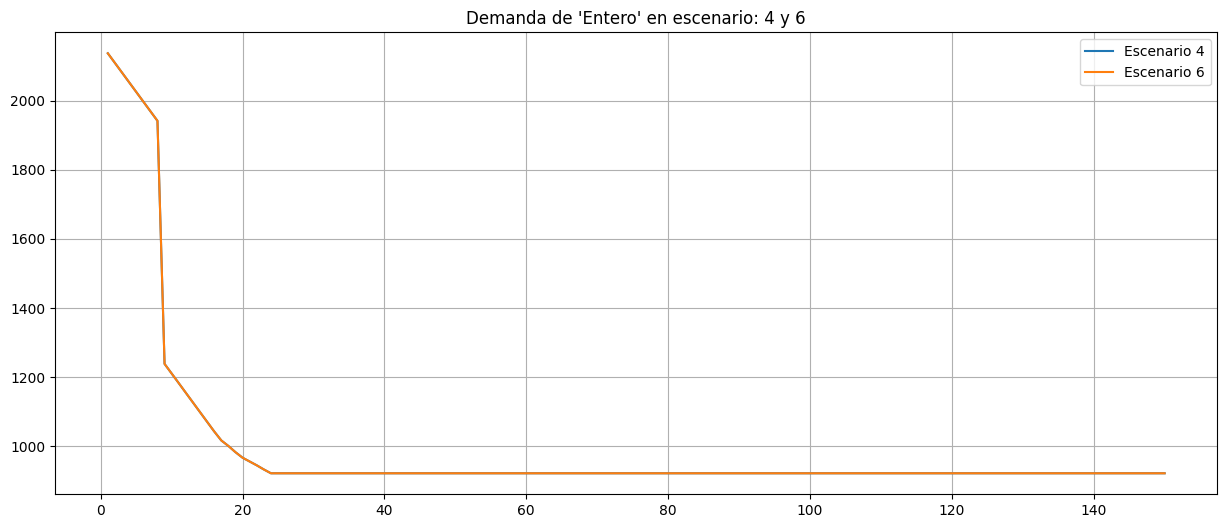

In [67]:
def generador_venta(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    sales = pd.read_excel(file_name+"sales.xlsx")
    sales['value'] = sales['value']/replics
    sales = sales.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return sales

sales_A = generador_venta(6)

def generador_dda(experiment, replics=1):
    file_name = f"Resultados/Escenario {experiment}/"
    D = pd.read_excel(file_name+"D.xlsx")
    D['value'] = D['value']/replics
    D = D.groupby(['f','t']).sum().reset_index()[['f', 't','value']]
    return D

D_A = generador_dda(6)

#Precios
plt.figure(figsize=(15,6))
plt.grid(True)

plt.plot(D_A.t[D_A.f == variable], D_A.value[D_A.f == variable], label=f"Escenario {escenario_A}")
plt.plot(sales_A.t[sales_A.f == variable], sales_A.value[sales_A.f == variable], label=f"Escenario {escenario_B}") 

plt.legend()
plt.title(label=f"Demanda de '{variable}' en escenario: {escenario_A} y {escenario_B}")
plt.show()



In [137]:
import pandas as pd

K, F, a = read_sheet(f"~/Desktop/Produccion-Tesis/Input/Constante.xlsx", "Patrones")

def generador_valores_residuales(replics=50):
        dictionary = {}
        P = pd.read_excel("~/Desktop/Produccion-Tesis/Resultados/Warmup/P.xlsx")
        P['value'] = P['value']/replics
        P = P[['f','t','r','value']].groupby(['f','t']).sum().reset_index()[['f','t','value']]
        P = P[P.t == 30][['f', 'value']]
        for row, value in P.iterrows():
                dictionary[value['f']] = round(value['value'])
        return dictionary


def generador_inventarios_iniciales(F, replics=50):
        dictionary = {f: {} for f in F}
        S0 = pd.read_excel("~/Desktop/Produccion-Tesis/Resultados/Warmup/S0.xlsx").reset_index()
        S0['value'] = S0['value']/replics
        S0 = S0[['f','u','r','value']].groupby(['f','u']).sum().reset_index()[['f','u','value']]
        for _, value in S0.iterrows():
                dictionary[value['f']][value['u']] = round(value['value'])
        return dictionary

In [140]:
S0 = generador_inventarios_iniciales(F)
S0

{'Entero': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 16, 7: 14, 8: 230},
 'Medio Pollo': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 8, 7: 30, 8: 406},
 'Medio Pollo Superior': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 3, 7: 66, 8: 478},
 'Medio Pollo Inferior': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 3, 7: 12, 8: 384},
 'Cuarto de Pollo Superior': {1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 19,
  7: 48,
  8: 383},
 'Muslo Entero': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 103, 8: 652},
 'Pechuga Completa': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 35, 7: 258, 8: 862},
 'Ala Completa': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 25, 8: 216},
 'Media Pechuga': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 389, 8: 1601},
 'Blanqueta': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 27, 8: 27},
 'Alón': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 7, 8: 9},
 'Punta': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2, 8: 2},
 'Jamoncito': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 8, 7: 87, 8: 440},
 'Medio Muslo': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 17, 7: 160, 8: 899}}